In [563]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

class fasor:
    """
    fasor(mod, angulo_em_graus, origem_x = 0, origem_y = 0)
    fasor(a, b, origem_x = 0, origem_y = 0), polar = False) para retangular
    """
    def __init__(self, nome=None,arg1=None, arg2=None, ox=None, oy=None, isPolar=True):
        self.nome = nome;
        self.isPolar = isPolar;
        
        if (self.isPolar): #define na forma polar
            self.Mod = arg1;
            self.fase = arg2*np.pi/180.0;#converte para radianos
            self.retangular();
        else: #define na forma retangular
            self.a = arg1;
            self.b = arg2;
            self.polar();
       
        if ox == None or oy == None:
            self.ox = 0;
            self.oy = 0;
        else:
            self.ox = ox;
            self.oy = oy;

        self.texto();
        
    def __add__(self,fasor_ex):
        if isinstance(fasor_ex, fasor):
            soma_real = self.a + fasor_ex.a ;
            soma_imag = self.b + fasor_ex.b ;
            
            return fasor(f'{self.nome}+{fasor_ex.nome}', soma_real, soma_imag, isPolar=False);
        else:
            raise TypeError("Operação de soma não suportada para tipos diferentes.")
    
    def __sub__(self,fasor_ex):
        if isinstance(fasor_ex, fasor):
            soma_real = self.a - fasor_ex.a ;
            soma_imag = self.b - fasor_ex.b ;
            
            return fasor(f'{self.nome}+{fasor_ex.nome}', soma_real, soma_imag, isPolar=False);
        else:
            raise TypeError("Operação de subtração não suportada para tipos diferentes.")

    def __mul__(self,escalar):
        if isinstance(escalar, (int,float)):
            soma_real = self.a * escalar ;
            soma_imag = self.b * escalar;
            
            return fasor(f'{self.nome}x{escalar}', soma_real, soma_imag, isPolar=False);
        else:
            raise TypeError("Operação de multiplicão não suportada para tipos os tipos informados.")
    def __rmul__(self,escalar):
        return self*escalar;

    def __mul__(self,fasor_ex):
        if isinstance(fasor_ex, fasor):
            modulo = self.Mod * fasor_ex.Mod  ;
            fase = self.fase + fasor_ex.fase ;
            
            return fasor(f'{self.nome}x{fasor_ex.nome}', modulo, fase, isPolar=True);
        else:
            raise TypeError("Operação de multiplicão não suportada para tipos os tipos informados.")
            
    def retangular(self):

        self.a = self.Mod * np.cos(self.fase);
        self.b = self.Mod * np.sin(self.fase);

    def polar(self):

        self.Mod = (self.a ** 2 + self.b**2)**0.5;
        self.fase = np.arctan(self.b / self.a);

        if self.a < 0:
           self.fase = self.fase + np.pi;


    def texto(self):
        self.text_X =  self.ox + (self.Mod+2)*np.cos(self.fase);
        self.text_Y =  self.ox + (self.Mod+2)*np.sin(self.fase);


        
    def plot(self):
        flexa = plt.arrow(self.ox,self.oy,self.a,self.b, width = 0.2, color = np.random.rand(1,3))
        plt.gca().axes.text(self.text_X, self.text_Y , f'{self.nome}=${self.Mod:.2f}$ $/\_ {self.fase*180/np.pi:.0f}°$', horizontalalignment='center', verticalalignment='center')
        

# Transformador Ideal em Vazio

* Transformador ideal em vazio: as perdas são desprezadas (perdas enrolamentos e núcleo, fluxo disperso são zero).
* Considere que o enrolamento primário tem $N_1$ esperias, sendo alimentado por uma fonte CA de tensão $V_f$.
* Surgirá um corrente no enrolamento primário de valor $I_o$, chamada corrente de magnetização, servindo apenas para magnetizar o núleo com um fluxo $\phi_0$.

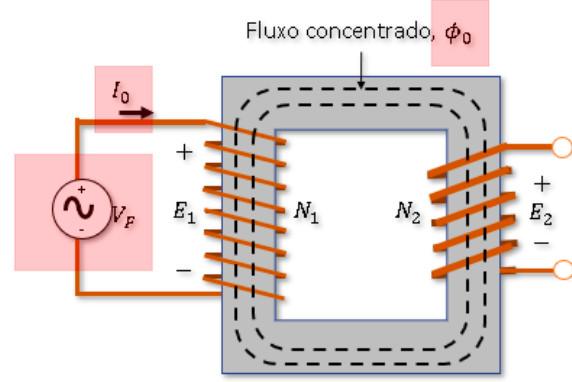

* O fluxo $\phi_0$ concatena ambos enrolamentos primário e secundário. Como $\phi_0(t)$ varia  de forma senoidal por casua da fonte CA $V_f$, são induzidas tensões $E_1$ e $E_2$, nos respectivos enrolamentos.
* Pela lei das malhas, percebe-se que a tensão $E_1=V_f$, quando o transformador está em regime permanente ou equilibrado. Neste caso a corrente $I_0$ estabiliza-se no seu valor como módulo e fase constantes.
* No enrolamento secundário também é induzida a tensão $E_1$, mas como nenhuma carga está conectada a corrente $I_2=0$.

## Corrente de excitação ou magnetização
* A corrente $I_0$ tem valor pequeno em comparação com a corrente nominal do transformadorna prática esse valor gira em torno de 1-5% da corrente nominal do transformador.
* Como não á nada consumindo potência ativa no secundário e as perdas são nulas, observa-se que o enrolamento primário é um indutor, cujo efeito é atrasar a corrente em 90º em relação a tensão $E_1$.
* O fluxo estará em fase com $I_0$, logo, também estará atraso em 90° em relação a tensão $E_1$.
* A tensão no secundário está em fase com a tensão $E_1$, considerando a polaridade subtrativa.

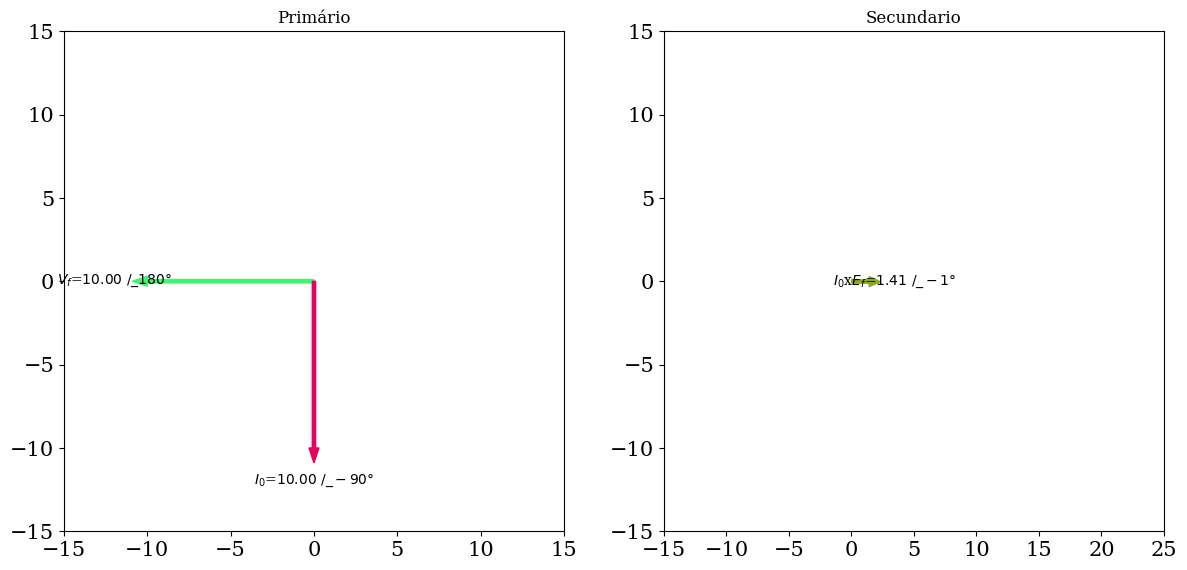

In [566]:

fig = plt.figure(figsize=(10, 10))

#eixo de coordenadas para o primário
ax = fig.add_axes([0, 0, 0.5, .5] )
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
plt.title('Primário') 



Vf = fasor('$V_f$', 10, 180, isPolar=True)
I0 = fasor('$I_0$',10, -90, isPolar=True)

Vf.plot()
I0.plot()

# secundário do transformador

E1 = fasor('$E_1$', 10, 0, 0, 0 , isPolar=True)
E2 = fasor('$E_2$', 20, 0, 0, 0 , isPolar=True)

#definindo novos eixos de coordenadas

ax2 = fig.add_axes([0.6, 0, 0.5, .5] )
# E1.plot()
# E2.plot()
Ef = fasor ('$E_f$', 0.1,0.1, isPolar = False)
ax2.set_xlim(-15, 25)
ax2.set_ylim(-15, 15)
plt.title('Secundario') ;

# Ef.plot() 
(I0*Ef ).plot()

